# Prova 1 - Questão 4

Autora: Luiza Lober de Souza Piva, nUSP: 9302292

### Configuração

In [ ]:
#Ler e manipular dataframes e valores
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

#Importar os dados
import requests as rq
from io import BytesIO

In [ ]:
#Cria o dataframe com os dados de QI
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/estatistica-2s2022/p1/QI.csv'   #adicionei no github por erros na importacão via edisciplinas
data = rq.get(url).content
df = pd.read_csv(BytesIO(data), sep=',')    #esta tabela não é decodificada por utf-8

In [ ]:
#Visualizando os dados:
df

,Id,Genero,QI_Total,QI_Verbal,QI_Performance,Peso,Altura,RM_Cont
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,140,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


## Teste t de Student pareado

### Hipóteses

*  Homocedasticidade (variâncias iguais, porém desconhecidas);
*  A distribuição satisfaz o T.C.L. para um tamanho amostral suficientemente grande;
*  Observações independentes;

Vamos checar a primeira hipótese:

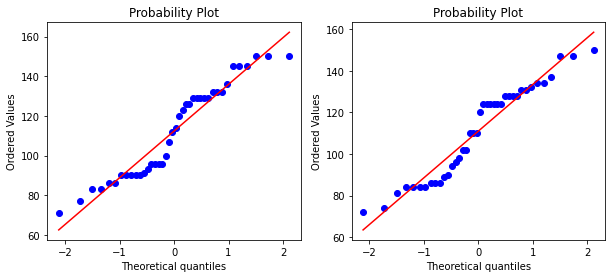

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

_ = stats.probplot(
    df['QI_Verbal'],       # Dados
    plot=axs[0]            # Grafica no primeiro eixo
)

_ = stats.probplot(
    df['QI_Performance'],       # Dados
    plot=axs[1]            # Grafica no primeiro eixo
)

A distribuição aparenta ser normal. Vamos testar também com o teste de Bartlett (definido na seção **Teste de homocedasticidade**):

In [ ]:
bart_verif = sp.bartlett(df['QI_Verbal'], df['QI_Performance'])

#Escreve os resultados
#-> Teste de Bartlett
print('---Teste de Bartlett---')
print('Resultado do teste: ', bart_verif[0])
print('p-valor: ', bart_verif[1])

---Teste de Bartlett---
Resultado do teste:  0.09507947615032042
p-valor:  0.7578163276423272


Logo, podemos assumir homocedasticidade.

### Cálculo

**Estatística do teste:**

$$ \frac{  \bar{X_{1}} - \bar{ X_{2}}  }{ \sqrt{ S_p^2 (1/n_1 + 1/n_2) } }, $$

onde $S_p^2 = \frac{ (n_1 -1)S_1^2 + (n_2 -1)S_2^2 }{ n_1 + n_2 -1 }$.

Escolhi fazer a comparação entre QI verbal e de performance através do teste t de Student pareado dado que:

*  Amostras pareadas geralmente consistem de pares de unidades similares, o que é verdade para essas duas variáveis.
  * Múltiplos resultados de QI para os indivíduos também seriam estudados adequadamente por esse teste.
*  Amostras pareadas mostram dependência, o que é uma interpretação razoável quando pensamos que haverá relação entre essas duas variáveis
  * Isto também poderia ser suposto sobre QIs verbais e o teste de RM, mas estas duas variáveis não tem unidades similares;
  * Suponho que a performance medida deverá ter influência do quão bem a pessoa consiga se expressar durante os testes.



Para isto, vamos utilizar o módulo `ttest_rel()` da biblioteca do `scipy.stats` para aplicar este cálculo.

* Existem dois testes t de Student no Scipy: `ttest_rel()` e `ttest_ind()`. A escolha por este primeiro se deu justamente pelo caráter pareado das variáveis.

In [ ]:
res_student = sp.ttest_rel(df['QI_Verbal'], df['QI_Performance'])

print('Resultado do teste t pareado: ', res_student[0])
print('p-valor: ', res_student[1])

Resultado do teste t pareado:  0.5445841763599564
p-valor:  0.5891401178507841


Logo, não há uma diferença grande entre as duas medidas p-valor$>α = 0.05$.

## Correlação de Pearson

Como dito acima, o QI verbal e o resultado de RM estão em unidades distintas. Portanto, se queremos verificar se há relação entre essas variáveis, o método mais adequado dentre os três é o cálculo da correlação de Pearson entre elas.

Este teste mede a correlação linear entre duas variáveis, com $0\leq p \leq 1$:
*  $p=\pm 1$ mostra correlação completa: crescente se positiva, decrescente se negativa;
*  $p=0$ indica que não há correlação entre as variáveis. 

In [ ]:
pearson_sp = sp.pearsonr(df['QI_Verbal'], df['RM_Cont'])

print('Correlação de pearson entre QI verbal e dados de RM: ', pearson_sp[0])
print('p-valor: ', pearson_sp[1])

Correlação de pearson entre QI verbal e dados de RM:  0.33747772802033543
p-valor:  0.033201762692926864


O resultado acima indica que não há uma correlação entre o QI verbal e os resultados de ressonância magnética, ao menos assumindo $α = 0.05 >$ p-valor.

Mesmo que um $α$ menor seja adotado, o valor de correlação das variáveis ainda é fraco.

## Teste de homocedasticidade

Homocedasticidade entre variáveis ocorre quando as variâncias das mesmas são iguais. Utilizarei aqui dois testes para essas comparações: o teste de Bartlett e o de Levene [[1]](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm).

*  Bartlett: é mais sensível à variações dos dados em relação à distribuição normal, o que também pode gerar uma interpretação de desvios da normalidade para os dados, caso eles não apresentem este perfil.
*  Levene: mais robusto à desvios da normalidade, isto é, as respostas do teste não indicarão variâncias diferentes somente pela distribuição dos dados não ser normal. Será calculado através da mediana dos dois conjuntos de dados.

Vamos começar por uma verificação visual dos resultados, antes de aplicar os testes. A função `CalculaGaussiana()` abaixo fará um ajuste de distribuição normal em $4\sigma$ para cada um dos dados graficados.

In [ ]:
def CalculaGaussianas(coluna):
  '''
  Calculo da gaussiana associada ao histograma em questão.
  Para ser utilizada com a função seguinte.
  '''
  mean = coluna.mean()
  std = coluna.std()
  x_pdf = np.linspace(mean-4*std, mean+4*std, 200)    #considera 4 desv. pad. da média e 200 pontos
  y_pdf = sp.norm.pdf(x_pdf, mean, std)

  return x_pdf, y_pdf

In [ ]:
#Primeiro, separa os grupos
df_fem = df.loc[df['Genero'] == 'Female']
df_masc = df.loc[df['Genero'] == 'Male']

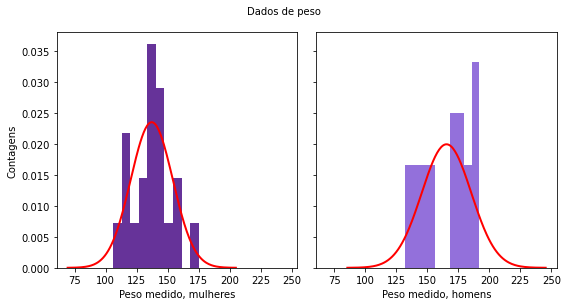

In [ ]:
#Faz os gráficos
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True, sharex=True)

axs[0].hist(df_fem['Peso'], density=True, color = 'rebeccapurple')
x_pdf, y_pdf = CalculaGaussianas(df_fem['Peso'])
axs[0].plot(x_pdf, y_pdf, 'r', lw=2)
axs[0].set_ylabel('Contagens')
axs[0].set_xlabel('Peso medido, mulheres')

axs[1].hist(df_masc['Peso'], density=True, color = 'mediumpurple')
x_pdf, y_pdf = CalculaGaussianas(df_masc['Peso'])
axs[1].plot(x_pdf, y_pdf, 'r', lw=2)
axs[1].set_xlabel('Peso medido, homens')

fig.tight_layout()
fig.text(0.5, 1.025, 'Dados de peso', ha='center')
plt.show()

Note que a distribuição de peso das mulheres está visualmente mais próxima de uma distribuição normal. Podemos também testar isto quantitativamente, como feito no teste de hipóteses do **Teste t de Student pareado**:

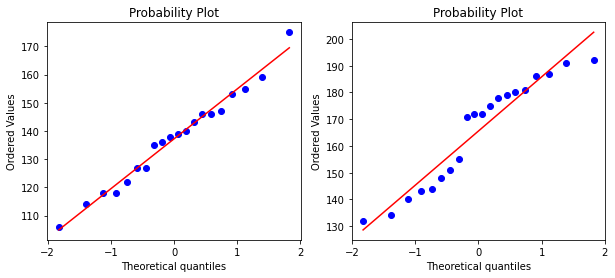

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

_ = stats.probplot(
    df_fem['Peso'],       # Dados das mulheres
    plot=axs[0]            # Grafica no primeiro eixo
)

_ = stats.probplot(
    df_masc['Peso'],       # Dados dos homens
    plot=axs[1]            # Grafica no primeiro eixo
)

Onde verificamos que de fato a distribuição de pesos das mulheres é mais próxima da normal.

Por fim, vamos aplicar os testes de Bartlett e de Levene para testar a homocedasticidade. 
*  Por conta das definições acima e do desvio da normalidade para o peso dos homens, o teste de Levene é mais adequado para interpretações.

In [ ]:
bart = sp.bartlett(df_fem['Peso'], df_masc['Peso'])
leve = sp.levene(df_fem['Peso'], df_masc['Peso'])

#Escreve os resultados
#-> Teste de Bartlett
print('---Teste de Bartlett---')
print('Resultado do teste: ', bart[0])
print('p-valor: ', bart[1])

#-> Teste de Levene
print('---Teste de Levene---')
print('Resultado do teste: ', leve[0])
print('p-valor: ', leve[1])

---Teste de Bartlett---
Resultado do teste:  0.49879290479927724
p-valor:  0.4800309900227211
---Teste de Levene---
Resultado do teste:  0.9035509164460875
p-valor:  0.3478382980990077


Logo, assumindo $\alpha = 0.05$, decido pelas variâncias serem iguais (p-valor $> \alpha$).